# LLM Comparison
In this experiment we compare two instances of a Llama-3.3-70B model. One which is called via the DeepInfra API and one locally hosted on the LRZ server. The latter is a GPTQ quantized version of the model. We want to show, that the locally hosted version can be used for all experiments and can keep up with the DeepInfra model. This allows for more extensive experiments, since we do not have to consider any API costs.<br>
For the quantized model version we used the following system prompt: "You are a helpful, harmless, and honest assistant. You answer the user's questions accurately and fairly." (for the API hosted model this cannot be specified).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = pd.read_csv("../results/llm_comparison/summary.csv")
deepinfra_df = pd.read_csv("../results/llm_comparison/deepinfra_responses.csv")
vllm_df = pd.read_csv("../results/llm_comparison/vllm_responses.csv")

## Compare Answers
Using the first three samples we compare some answers of the models (stored in deepinfra_df and vllm_df).

### DeepInfra hosted model

1: The main topic of the news article is: Hackers exploiting a flaw in Microsoft's JPEG format.Category: Tech <br>
2: The main topic of the news article is: Arsenal's win in the Premier LeagueCategory: Sports <br>
3: The main topic of the news article is: Temporary Flight Caps at O'Hare Airport.I choose: Business. <br>

### Locally hosted model

1: The main topic of the news article is: Hackers exploiting a security flaw in Microsoft's JPEG format.Category: Tech <br>
2: The main topic of the news article is: Arsenal's win in the Premier League.Category: Sports. <br>
3: The main topic of the news article is: Air Traffic Control and Flight Regulations.I choose: Business. <br>

### Result
The answers are very similar to each other, which already indicates, that the local LLM can be used instead of the API-hosted one.

## Compare Performance
We furthermore compare the performance of both models on 2 different tasks and throughout all initial prompt proposed by the EvoPrompt paper. For all runs we use the dev set with the same 200 samples per task.

In [16]:
avg_df = (
    comparison_df.groupby(["model_name", "dataset"]).agg({"score": ["mean", "std"]}).reset_index()
)
avg_df.columns = ["model_name", "dataset", "mean", "std"]
avg_df["platform"] = ["vllm" if "vllm" in x else "deepinfra" for x in avg_df["model_name"]]

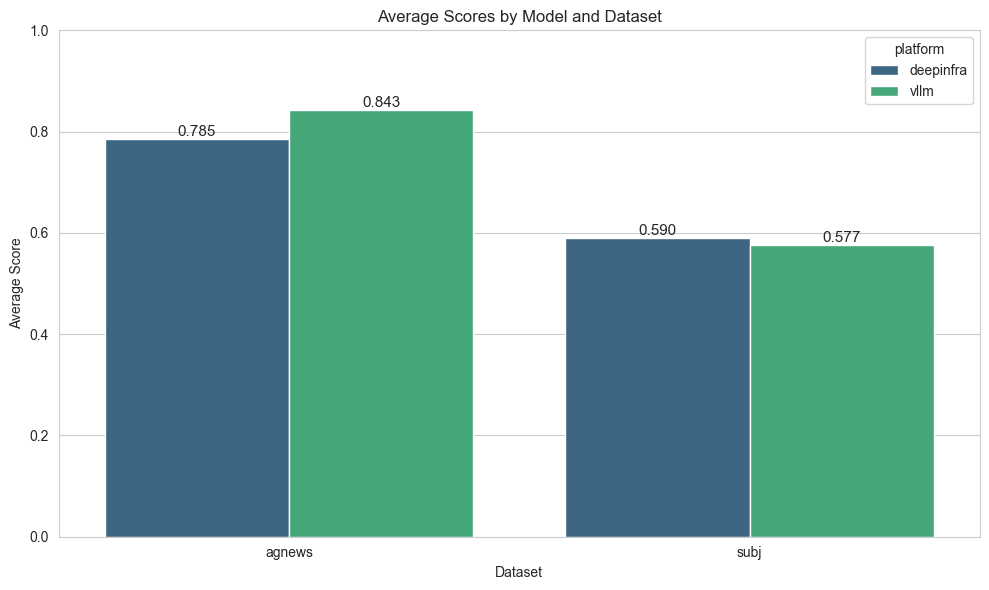

In [8]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot dataset on x-axis, models as groups
ax = sns.barplot(x="dataset", y="mean", hue="platform", data=avg_df, palette="viridis")

plt.title("Average Scores by Model and Dataset")
plt.xlabel("Dataset")
plt.ylabel("Average Score")
plt.ylim(0, 1)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.3f}",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
            fontsize=11,
        )

plt.legend(title="platform", loc="upper right")

plt.tight_layout()
plt.show()

In [15]:
table_data = []
for _, row in avg_df.iterrows():
    table_data.append([row["platform"], row["dataset"], f"{row['mean']:.3f} ± {row['std']:.3f}"])

pd.DataFrame(table_data, columns=["platform", "dataset", "score"])

,platform,dataset,score
0,deepinfra,agnews,0.785 ± 0.095
1,deepinfra,subj,0.590 ± 0.055
2,vllm,agnews,0.843 ± 0.040
3,vllm,subj,0.577 ± 0.066
